In [ ]:
#Friday the 13th Project

In [ ]:
''' People are less superstitious now about Friday the 13ths than when I was born'''


In [97]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import seaborn as sns
from pandas.io.json import json_normalize
import requests
import sqlalchemy
from sqlalchemy import create_engine
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway

In [2]:
data00s = pd.read_csv('/Users/erinberardi/Downloads/US_births_2000-2014_SSA.csv')
#dataSHOP =pd.read_excel('/Users/erinberardi/Downloads/FridayThe13th.xls')
# dataTRAF=pd.read_excel('/Users/erinberardi/Downloads/traffic F13.xls.numbers')
# dataACC=pd.read_excel('/Users/erinberardi/Downloads/accidentF13.xls.numbers')
data70s = pd.read_csv('/Users/erinberardi/Downloads/birthdates-1968-1988.csv')

In [3]:
driver = 'mysql+pymysql:'
user = 'root'
password = '3r1nb3rard1'
ip = '127.0.0.1'
database = 'Data1970s'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string, pool_size=10, max_overflow=20)

In [27]:
data70s.to_sql('birthday1970',engine)

In [29]:
data00s.to_sql('birthday2000',engine)

In [4]:
data00s.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [5]:
data00s.shape

(5479, 5)

In [ ]:
'''
Ho = The average births on other days will be the same as on a Friday the 13th.
H1 = The average births on other days will NOT be the same as on a Friday the 13th.

Ho = The average births on Friday the 13th in the 70s will be the same as in the 00s.
H1 = The average births on Friday the 13th in the 70s will be different than in the 00s'''

In [6]:
_70data = data70s.drop(data70s.index[(data70s.year<1970) | (data70s.year>1979)])

In [7]:
_70data.head()

,year,month,day,births,day_of_year,day_of_week
365,1970,1,1,8372,1,4
366,1970,1,2,9234,2,5
367,1970,1,3,9162,3,6
368,1970,1,4,8620,4,7
369,1970,1,5,9852,5,1


In [8]:
data70s = data70s.drop(data70s.index[(data70s.year<1970) | (data70s.year>1979)])
       
data70s


,year,month,day,births,day_of_year,day_of_week
365,1970,1,1,8372,1,4
366,1970,1,2,9234,2,5
367,1970,1,3,9162,3,6
368,1970,1,4,8620,4,7
369,1970,1,5,9852,5,1
...,...,...,...,...,...,...
4012,1979,12,27,10504,362,4
4013,1979,12,28,10961,363,5
4014,1979,12,29,8990,364,6
4015,1979,12,30,8250,365,7


In [9]:
data00s.isnull().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

In [10]:
data70s.isnull().sum()

year           0
month          0
day            0
births         0
day_of_year    0
day_of_week    0
dtype: int64

In [9]:
data00s.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,5479.0,2006.999270,4.321085,2000.0,2003.0,2007.0,2011.0,2014.0
month,5479.0,6.522723,3.449075,1.0,4.0,7.0,10.0,12.0
date_of_month,5479.0,15.730243,8.801151,1.0,8.0,16.0,23.0,31.0
day_of_week,5479.0,3.999817,2.000502,1.0,2.0,4.0,6.0,7.0
births,5479.0,11350.068261,2325.821049,5728.0,8740.0,12343.0,13082.0,16081.0


In [10]:
data70s.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,3652.0,1974.499726,2.872293,1970.0,1972.00,1974.5,1977.0,1979.0
month,3652.0,6.523549,3.449005,1.0,4.00,7.0,10.0,12.0
day,3652.0,15.727820,8.800529,1.0,8.00,16.0,23.0,31.0
births,3652.0,9139.959748,946.267052,6675.0,8531.75,9172.5,9766.0,12466.0
day_of_year,3652.0,183.770537,105.626419,1.0,93.00,184.0,275.0,366.0
day_of_week,3652.0,4.000821,2.000479,1.0,2.00,4.0,6.0,7.0


In [11]:
dow00_mean = data00s.pivot_table(index= 'day_of_week',values = 'births',aggfunc = 'mean')
dow00_mean

,births
day_of_week,
1,11897.830140
2,13122.444444
3,12910.766284
4,12845.826087
5,12596.162404
6,8562.573436
7,7518.376756


([<matplotlib.axis.XTick at 0x7fbd54c63090>,
 <a list of 7 Text xticklabel objects>)

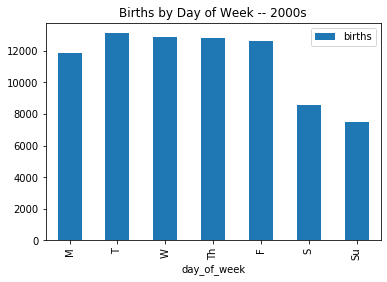

In [144]:
dow00_mean.plot.bar()
plt.title('Births by Day of Week -- 2000s')
plt.xticks(np.arange(7),['M','T','W','Th','F','S','Su'])

In [13]:
dow70_mean = data70s.pivot_table(index = 'day_of_week', values = 'births',aggfunc = 'mean')
dow70_mean

,births
day_of_week,
1,9378.195402
2,9770.504798
3,9500.752399
4,9393.846743
5,9564.191571
6,8415.568966
7,7958.557471


([<matplotlib.axis.XTick at 0x7fbd55be0510>,
 <a list of 7 Text xticklabel objects>)

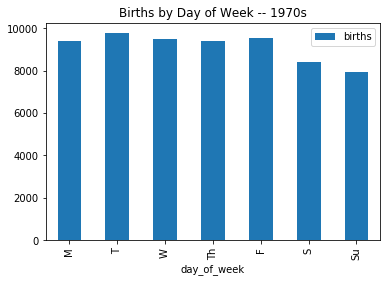

In [145]:
dow70_mean.plot.bar()
plt.title('Births by Day of Week -- 1970s')
plt.xticks(np.arange(7),['M','T','W','Th','F','S','Su'])

In [15]:
day_num_70 = data70s.pivot_table(index = 'day',columns = 'day_of_week', values = 'births',aggfunc = 'mean')
day_num_70

day_of_week,1,2,3,4,5,6,7
day,,,,,,,
1,9168.588235,9668.437500,9487.823529,9225.000000,9500.062500,8203.611111,8082.176471
2,9363.529412,9680.352941,9426.437500,9409.176471,9438.789474,8453.000000,7782.944444
3,9024.055556,9864.470588,9500.000000,9459.875000,9574.941176,8374.421053,8023.187500
4,9228.562500,9392.888889,9418.294118,9231.470588,9513.812500,8417.529412,7896.157895
5,9097.105263,9737.187500,9309.333333,9459.294118,9527.000000,8394.687500,7969.000000
6,9328.000000,9663.473684,9582.062500,9267.222222,9684.411765,8381.882353,7936.687500
7,9348.875000,9816.588235,9485.000000,9480.062500,9461.500000,8527.235294,7922.058824
8,9359.176471,9841.500000,9584.352941,9380.000000,9554.125000,8283.444444,8084.176471
9,9511.117647,9686.294118,9511.937500,9532.647059,9527.315789,8394.312500,7831.222222


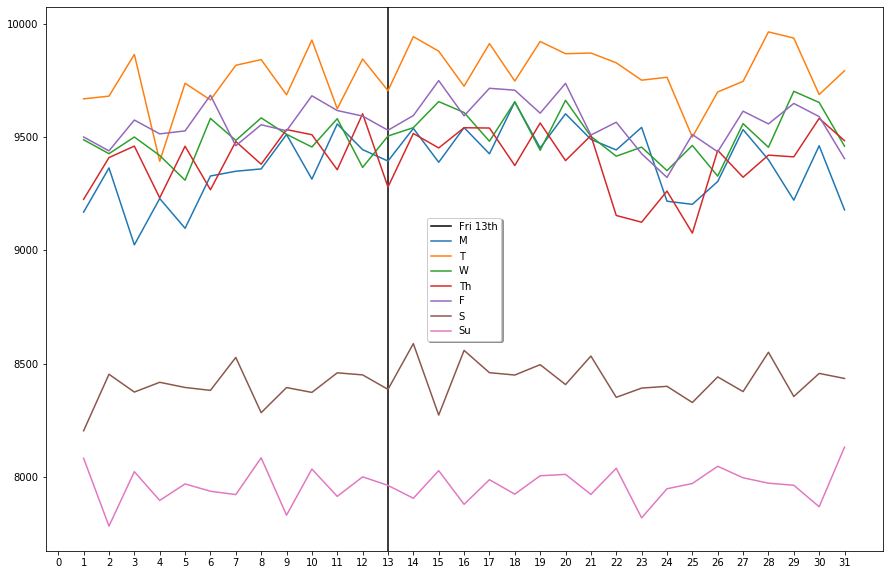

In [138]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(np.arange(0, 32, step=1))
ax.axvline(x=13, ymin=0, ymax=10000, color = 'k')
ax.plot(day_num_70)
mylabels=['Fri 13th','M','T','W','Th','F','S','Su']

ax.legend(loc='center', fancybox=True, shadow=True, labels=mylabels)

# ax.set_xlabel('Date')
# ax.set_ylabel('Average Births')
# ax.set_title('Births by Day of the Week -- 1970s')

plt.show()

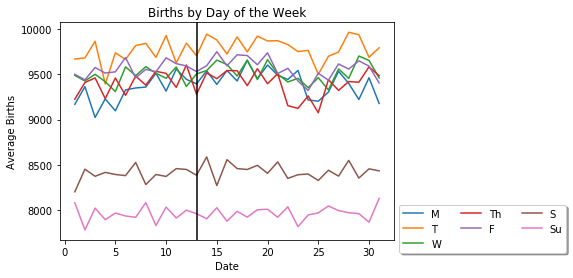

In [50]:
 
ax = day_num_70.plot()
mylabels=['M','T','W','Th','F','S','Su']
ax.legend(loc='center left', bbox_to_anchor=(1, .05),
          ncol=3, fancybox=True, shadow=True,labels=mylabels)
x_ticks = np.arange(0, 32, 5)

plt.xticks(x_ticks)
plt.xlabel('Date')
plt.ylabel('Average Births')
plt.title('Births by Day of the Week')
plt.axvline(x=13, ymin=0, ymax=10000,color='k')
plt.show()

In [146]:
day_num_00 = data00s.pivot_table(index = 'date_of_month',columns = 'day_of_week', values = 'births',aggfunc = 'mean')
day_num_00.head()

day_of_week,1,2,3,4,5,6,7
date_of_month,,,,,,,
1,11288.360000,12601.296296,12759.083333,12769.461538,12668.680000,8524.750000,7501.960000
2,11603.440000,13119.920000,12844.925926,13006.500000,12625.807692,8574.400000,7527.250000
3,11574.035714,13097.600000,13101.080000,12930.296296,12702.916667,8506.923077,7529.320000
4,11436.200000,12675.964286,12566.160000,12718.000000,12290.185185,8549.375000,7493.423077
5,11476.538462,13034.040000,12889.071429,12958.720000,12708.400000,8467.962963,7530.708333


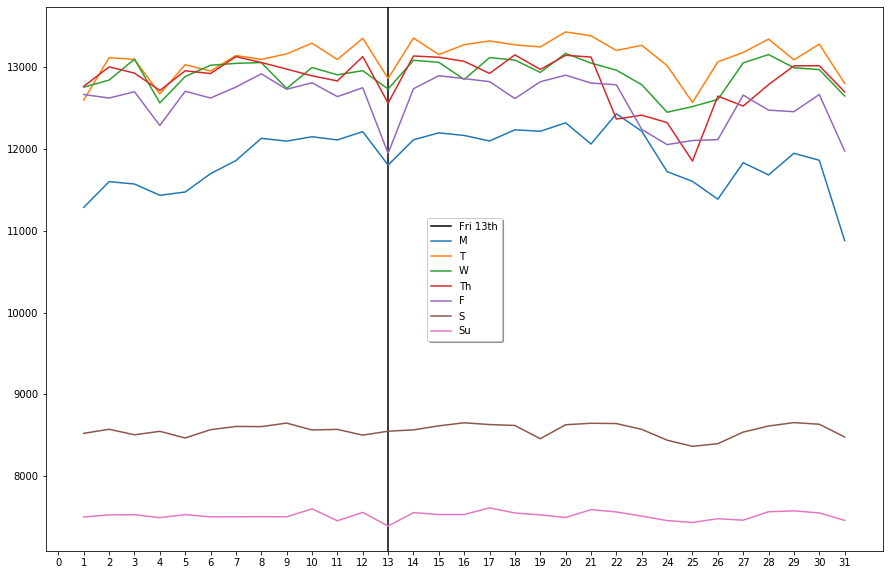

In [140]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(np.arange(0, 32, step=1))
ax.axvline(x=13, ymin=0, ymax=10000, color = 'k')
ax.plot(day_num_00)
mylabels=['Fri 13th','M','T','W','Th','F','S','Su']

ax.legend(loc='center', fancybox=True, shadow=True, labels=mylabels)

# ax.set_xlabel('Date')
# ax.set_ylabel('Average Births')
# ax.set_title('Births by Day of the Week -- 2000s')

plt.show()

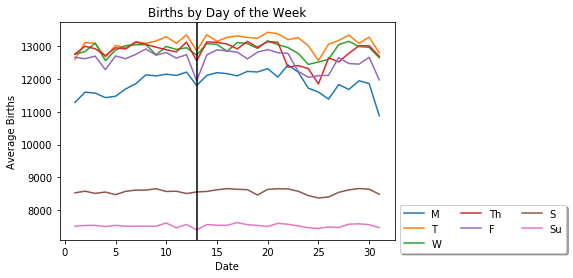

In [48]:
# fig = plt.figure(figsize= (12,8))

# ax = fig.add_subplot(1,1,1)
ax = day_num_00.plot()


mylabels=['M','T','W','Th','F','S','Su']

ax.legend(loc='center left', bbox_to_anchor=(1, .05),
         ncol=3, fancybox=True, shadow=True,labels=mylabels)

plt.xlabel('Date')
plt.ylabel('Average Births')
plt.title('Births by Day of the Week')
plt.axvline(x=13, ymin=0, ymax=10000,color ='k')

plt.show()



In [51]:
#dataED.head(60)

In [ ]:
'''Ho1 = The average births on other Fridays will be the same as on a Friday the 13th.
H11 = The average births on other Fridays will NOT be the same as on a Friday the 13th.

Ho2 = The average births on Friday the 13th will be the same as the 13th on other weekdays.
H12 = The average births on Friday the 13th will be different than the 13th on other weekdays.

Ho3 = the average births on all weekdays will be the same as on Friday the 13th.
H13 = the average births on all weekdays will be different than on Friday the 13th.'''

In [ ]:
#T-tessts for 2000s Decade

In [128]:
dow00_30 = day_num_00.drop(day_num_00.index[30])
dow00_wkdy = dow00_30.drop([6,7],axis=1)
dow00_wkdy

#Comparing Friday 13th to all Friday births 2000s
fri_13_avg00 = dow00_wkdy[5][13]
ttest_1samp(dow00_wkdy[5],fri_13_avg00)



Ttest_1sampResult(statistic=13.221422924640152, pvalue=8.301497841099325e-14)

In [107]:
#Comparing Friday 13th to all births on 13th 2000s
avg_day_13_00 = []

for i in dow00_wkdy:
    avg_day_13_00.append(dow00_wkdy[i][13])

ttest_1samp(avg_day_13_00,fri_13_avg00)



Ttest_1sampResult(statistic=2.034385756654577, pvalue=0.11165415893845208)

In [126]:
#Comparing Friday the 13th births to all other days and dates 2000s.
dow_avgs00 = []

for i in dow00_wkdy:
    dow_avgs00.append(dow00_wkdy[i].mean())

ttest_1samp(dow_avgs00,fri_13_avg00)



Ttest_1sampResult(statistic=3.5203861887507784, pvalue=0.02444153152793677)

In [ ]:
#T-tests for 1970s Decade

In [108]:
dow70_30 = day_num_70.drop(day_num_70.index[30])
dow70_wkdy = dow70_30.drop([6,7],axis=1)
dow70_wkdy


#Comparing Friday 13th to all Friday births 1970s
fri_13_avg70 = dow70_wkdy[5][13]
ttest_1samp(dow70_wkdy[5],fri_13_avg70)


Ttest_1sampResult(statistic=2.1719756140586477, pvalue=0.038176506969402)

In [106]:
#Comparing Friday 13th to all births on 13th 1970s
avg_day_13_70 = []

for i in dow70_wkdy:
    avg_day_13_70.append(dow70_wkdy[i][13])

ttest_1samp(avg_day_13_70,fri_13_avg70)

Ttest_1sampResult(statistic=-0.6673386265756087, pvalue=0.5410825695068492)

In [127]:
#Comparing Friday the 13th births to all other days and dates 1970s.

dow_avgs70 = []

for i in dow70_wkdy:
    dow_avgs70.append(dow70_wkdy[i].mean())

ttest_1samp(dow_avgs70,fri_13_avg70)


Ttest_1sampResult(statistic=-0.058709900006795455, pvalue=0.9559991658429035)